
# Trabalho 1

Para esse trabalho foi solicitado que o grupo faça uma análise dos dados referentes ao alunos da UFV. Para isso o grupo formulou 10 perguntas para ajudar a guiar na análise e entendimento dos dados. 

In [11]:
# biblioteca para ler os arquivos .ods
!pip install pandas_ods_reader
!pip install odfpy
import pandas as pd
from pandas_ods_reader import read_ods

# monta o drive onde esta salvo o arquivo que vai ser lido
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 38.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160691 sha256=a687fa24110e8c52a4a36c486970ca2113a9f97b358e3b1214ebdeef64644f14
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Os dados

Nessa primeira parte vamos fazer uma pequena análise inicial dos dados, descobrindo quais os dados que estão presentes e o que pode ser útil para nós.

In [12]:
# cria o dataframe com os dados do arquivo
#df = pd.read_excel('Dados de estudantes da UFV - 2022-12-12 (1).ods', engine='odf')
#df = read_ods('/content/drive/MyDrive/CCF425/Dados de estudantes da UFV - 2022-12-12.ods', 1)

print('Informações gerais do dataframe:')
df


Informações gerais do dataframe:


,Identificador,Ano_Nascimento,Sexo,Campus,Curso_Identificador,Curso,UF_Nascimento,Municipio_Nascimento,Admissao,Saida,Codigo_Situacao_Aluno,Situacao_Aluno,Situacao_Aluno_Agrupada,Modalidade_Inscrita,ENEM,Num_Reprovacoes,Raca,CRA
0,29271,1982.0,M,CAV,1101,CAV - Administração,RJ,VOLTA REDONDA,2000/1,2000/1,A,Abandono ...,Evasão,0.0,NaN,0,Informação não disponível,0.0
1,29272,1982.0,M,CAV,1101,CAV - Administração,DF,Brasília,2000/1,2002/1,A,Abandono ...,Evasão,0.0,NaN,3,Informação não disponível,71.2
2,34462,1979.0,F,CAV,1101,CAV - Administração,MG,Viçosa,2000/1,2005/1,C,Conclusão ...,Conclusão,0.0,NaN,3,Informação não disponível,78.5
3,34468,1979.0,F,CAV,1101,CAV - Administração,MG,Belo Horizonte,2000/1,2006/1,C,Conclusão ...,Conclusão,0.0,NaN,20,Pardo(a),56.0
4,34470,1980.0,F,CAV,1101,CAV - Administração,SP,São Paulo,2000/1,2004/2,C,Conclusão ...,Conclusão,0.0,NaN,1,Informação não disponível,76.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74021,172112,1996.0,NaN,CAV,1153,CAV - Bacharelado em Educação Física,NaN,NaN,2023/1,0,N,Normal ...,Matriculado,0.0,NaN,0,Informação não disponível,0.0
74022,172110,1995.0,NaN,CAV,1153,CAV - Bacharelado em Educação Física,NaN,NaN,2023/1,0,N,Normal ...,Matriculado,0.0,NaN,0,Informação não disponível,NaN
74023,172113,1996.0,NaN,CAV,1153,CAV - Bacharelado em Educação Física,NaN,NaN,2023/1,0,N,Normal ...,Matriculado,0.0,NaN,0,Informação não disponível,NaN
74024,172114,1998.0,NaN,CAV,1153,CAV - Bacharelado em Educação Física,NaN,NaN,2023/1,0,N,Normal ...,Matriculado,0.0,NaN,0,Informação não disponível,NaN


In [ ]:
df.info()

Com uma breve análise podemos observar do que os dados se tratam e algumas colunas que podemos considerar importantes para o trabalho. Abaixo vamos descrever sobre as colunas mais importantes para nós:

| Variável         | Descrição     | Valores |
|--------------|-----------|------------|
| Ano_Nascimento      | Ano do nascimento do aluno  |      |
| Sexo      | Sexo do aluno  |   M ou F   |
| Campus      | Campos do aluno  |   CAV, CAF ou CAR   |
| Curso      | Curso do aluno  |      |
| UF_Nascimento      | Estado de nascimento do aluno  |      |
| Municipio_Nascimento      | Cidade de nascimento do aluno  |      |
| Admissao      | Ano de admissao do aluno  |      |
| Saida      | Ano de saida do aluno  |      |
| Situacao_Aluno_Agrupada      | Situacao possivel do aluno  |   Matriculado, Evasao, Concluido   |
| Enem      | Nota do ENEM do aluno  |      |
| Num_Reporvacoes      | Numero de reprovações do aluno  |      |
| Raca      | raça do aluno  |      |
| CRA      | CRA do aluno  |      |

In [13]:
df.describe()

,Identificador,Ano_Nascimento,Curso_Identificador,Modalidade_Inscrita,ENEM,Num_Reprovacoes,CRA
count,7.402600e+04,73949.000000,74026.000000,68753.000000,39183.000000,74026.000000,74016.000000
mean,4.914848e+06,1990.876442,1427.490963,3.457725,629.164453,4.968444,61.882511
std,1.032870e+07,8.366123,653.483918,3.957373,68.806862,5.946912,24.364191
min,5.471000e+03,1900.000000,1101.000000,0.000000,253.240000,0.000000,0.000000
25%,6.667525e+04,1986.000000,1112.000000,0.000000,587.660000,0.000000,51.400000
50%,1.119175e+05,1992.000000,1127.000000,1.000000,634.580000,3.000000,69.600000
75%,1.622678e+05,1997.000000,1149.000000,9.000000,676.260000,7.000000,79.300000
max,3.001076e+07,2022.000000,3112.000000,9.000000,847.380000,93.000000,100.000000


1- Se a nota do Enem está relacionada com a nota do CRA.

Correlacao  0.2831129922350009


<Axes: xlabel='ENEM', ylabel='CRA'>

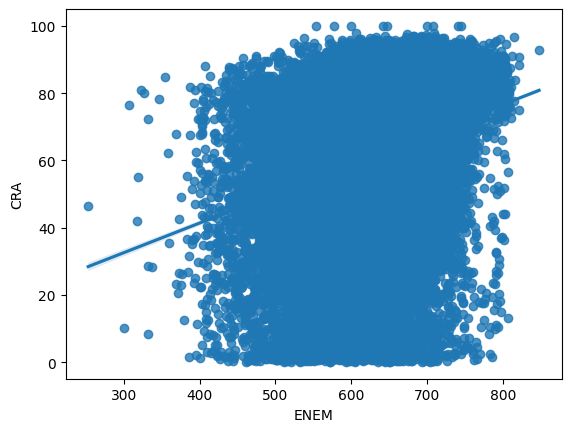

In [79]:
import seaborn as sns
enem_cra = df[['ENEM','CRA']] #Filtrando somente colunas necessárias

enem_cra = enem_cra.dropna() #Excluindo linhas que possuem valores vazios
enem_cra = enem_cra.drop(enem_cra[enem_cra['ENEM'] <= 0].index) #Excluindo notas do ENEM <= 0 
enem_cra = enem_cra.drop(enem_cra[(enem_cra['CRA'] <= 0)].index) #Excluindo notas de CRA <= 0

#enem_cra = enem_cra.groupby('ENEM')['CRA'].mean() #Agrupando pela nota do ENEM e calculando média do CRA

correlacao_ENEM_CRA = enem_cra['ENEM'].corr(enem_cra['CRA'])
print("Correlacao ",correlacao_ENEM_CRA)

sns.regplot(x='ENEM', y='CRA', data=enem_cra)
